In [125]:
import keras

``Data``

In [126]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # collection of 28*28 pixel grayscale images

In [127]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# (x, y, z, *c) -> (no. of images, height, width, *channel)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [128]:
x_train[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [129]:
y_train[0: 10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [130]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '5')

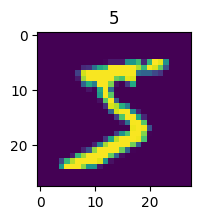

In [131]:
plt.figure(figsize = (2, 2))

plt.imshow(x_train[0, :, :])
plt.title(f"{y_train[0]}")

Normalization

In [132]:
# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [133]:
x_train[0, :, :]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [134]:
import numpy as np

In [135]:
arr = np.array(
  [[1, 2, 3],
  [4, 5, 5]]
)
arr.shape

(2, 3)

In [136]:
np.expand_dims(arr, axis=-1)

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [5]]])

### Adding chaneel information

In [137]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [138]:
# value bhayeko thau ma 1 halyo
y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

In [139]:
y_train.shape

(60000, 10)

### Neural Network Creation

In [140]:
from keras import layers

In [141]:
# dropout -> overfitting protect (Regularization)

In [142]:
model = keras.Sequential() # root node

In [143]:
model.add(layers.Input((28, 28, 1)))

model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=1, padding="valid", name="1st_conv")) #, activation='relu'
model.add(layers.Activation('relu', name="1st_activation"))
model.add(layers.MaxPool2D(pool_size=2, name="1st_maxpool"))

model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, padding="valid", name="2nd_ conv"))
model.add(layers.Activation('relu', name="2nd_activation"))
model.add(layers.MaxPool2D(pool_size=2, name="2nd_maxpool"))

model.add(layers.Flatten()) # higher dimension to lower dimension
model.add(layers.Dense(128))

model.add(layers.Dropout(0.3)) # 30% inactive
model.add(layers.Dense(10, activation='softmax')) # number of output values, softmax-> logits to probabilty (highest)

In [144]:
# compile model
model.compile(
  optimizer ="adam",
  loss = keras.losses.categorical_crossentropy,
  metrics = ["accuracy"]
)

In [145]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 1st_conv (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1st_activation (Activation)     │ (None, 26, 26, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1st_maxpool (MaxPooling2D)      │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_conv (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_activation (Activation)     │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_maxpool (MaxPooling2D)      │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,866 (210.41 KB)

 Trainable params: 53,866 (210.41 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
# None -> send dynamic value (batch dimension)
# Params # -> number of parameters to optimize

In [147]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.plot()

NameError: name 'history' is not defined

In [123]:
model.fit(x_train,y_train, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7801 - loss: 0.7177 - val_accuracy: 0.9715 - val_loss: 0.0949
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9613 - loss: 0.1243 - val_accuracy: 0.9800 - val_loss: 0.0694
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9732 - loss: 0.0883 - val_accuracy: 0.9813 - val_loss: 0.0629
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9773 - loss: 0.0736 - val_accuracy: 0.9865 - val_loss: 0.0509
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9800 - loss: 0.0618 - val_accuracy: 0.9872 - val_loss: 0.0486
